## High Boost Filtering

In [1]:
import numpy as np
import math as mt
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def gaussian_function(sigma,u,v):
    l = mt.pow(2.71, (-(v**2 + u**2)/(2*sigma*sigma))) /(2*mt.pi*sigma*sigma)
    return l

In [3]:
def gaussion_filter(sigma):
    z = int(np.ceil(3*sigma))
    row = col = 2*z+1
    kernel = np.zeros((row,col))
    set = [x for x in range(-z,z+1)]
    for i in range(len(set)):
        for j in range(len(set)):
            kernel[i][j] = gaussian_function(sigma,set[i],set[j])
    return (kernel / np.sum(kernel))

In [4]:
sigma = 0.5
gaussion_filter(sigma)

array([[7.29162520e-08, 2.88828525e-05, 2.12118557e-04, 2.88828525e-05,
        7.29162520e-08],
       [2.88828525e-05, 1.14407851e-02, 8.40222698e-02, 1.14407851e-02,
        2.88828525e-05],
       [2.12118557e-04, 8.40222698e-02, 6.17067952e-01, 8.40222698e-02,
        2.12118557e-04],
       [2.88828525e-05, 1.14407851e-02, 8.40222698e-02, 1.14407851e-02,
        2.88828525e-05],
       [7.29162520e-08, 2.88828525e-05, 2.12118557e-04, 2.88828525e-05,
        7.29162520e-08]])

In [5]:
np.sum(gaussion_filter(sigma))

1.0

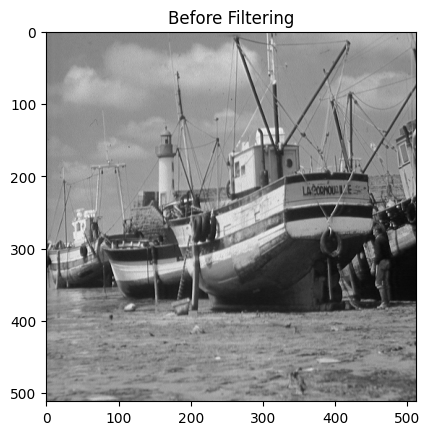

In [6]:
im = cv.imread('CoverImages/fishingboat.tiff',0)
plt.imshow(im, cmap='gray')
plt.title("Before Filtering")
plt.show()

In [7]:
def convolution(image, kernel):
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    result = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            pixel_sum = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    pixel_sum += padded_image[i + m][j + n] * kernel[m][ n]
            result[i][j] = pixel_sum

    return result

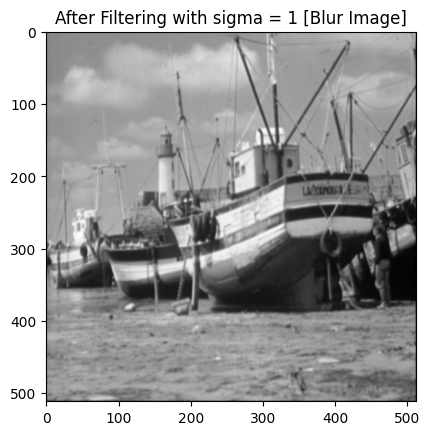

In [8]:
sigma = 1
img1 = convolution(im,gaussion_filter(sigma))
plt.imshow(img1, cmap='gray')
plt.title("After Filtering with sigma = 1 [Blur Image]")
plt.show()

In [9]:
## Highboost Filtering 

In [10]:
# Step 1 Create Blur image
img1

array([[ 61,  82,  86, ..., 117, 109,  81],
       [ 83, 111, 117, ..., 157, 148, 110],
       [ 87, 118, 125, ..., 167, 157, 116],
       ...,
       [ 79, 108, 119, ...,  98,  90,  68],
       [ 74, 101, 110, ...,  95,  87,  65],
       [ 55,  75,  81, ...,  70,  64,  48]], dtype=uint8)

In [11]:
im

array([[127, 123, 125, ..., 165, 169, 166],
       [128, 126, 128, ..., 169, 163, 167],
       [128, 124, 128, ..., 178, 160, 175],
       ...,
       [112, 112, 115, ..., 101,  97, 104],
       [110, 112, 117, ..., 104,  93, 105],
       [113, 115, 121, ..., 102,  95,  97]], dtype=uint8)

In [12]:
mask = np.zeros((512,512), dtype=int)
for i in range(512):
    for j in range(512):
        mask[i][j] = im[i][j] - img1[i][j]

        

C:\Users\USER\AppData\Local\Temp\ipykernel_3268\3642021218.py:4: RuntimeWarning: overflow encountered in scalar subtract
  mask[i][j] = im[i][j] - img1[i][j]


In [13]:
mask

array([[ 66,  41,  39, ...,  48,  60,  85],
       [ 45,  15,  11, ...,  12,  15,  57],
       [ 41,   6,   3, ...,  11,   3,  59],
       ...,
       [ 33,   4, 252, ...,   3,   7,  36],
       [ 36,  11,   7, ...,   9,   6,  40],
       [ 58,  40,  40, ...,  32,  31,  49]])

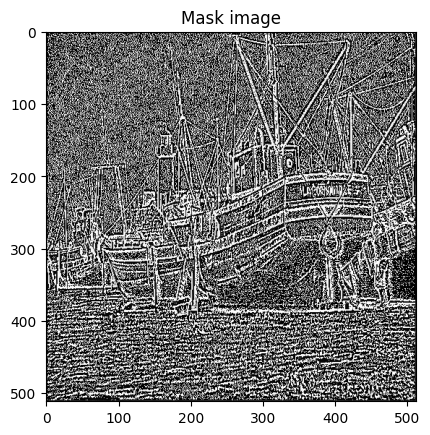

In [14]:
plt.imshow(mask, cmap='gray')
plt.title("Mask image")
plt.show()

In [15]:
highBoost = np.zeros((512,512), dtype=int)
for i in range(512):
    for j in range(512):
        highBoost[i][j] = im[i][j] + 1.5*mask[i][j]

In [16]:
max = np.max(highBoost)
max

612

In [17]:
mainHighBoost = np.zeros((512,512), dtype=int)
for i in range(512):
    for j in range(512):
        mainHighBoost[i][j] = mt.ceil( (highBoost[i][j]/max) * 255)

In [18]:
max = np.max(mainHighBoost)
max

255

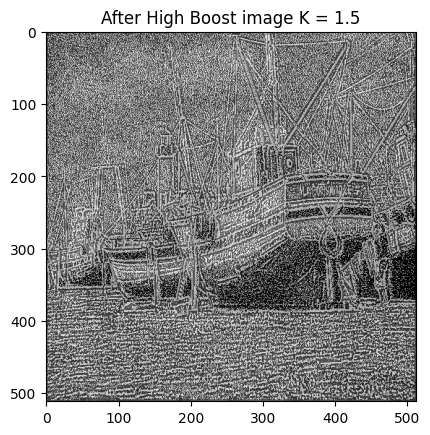

In [19]:
plt.imshow(mainHighBoost, cmap='gray')
plt.title("After High Boost image K = 1.5")
plt.show()